In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from Countrydetails import countries

In [2]:
world_gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world_gdf.drop('pop_est', axis=1, inplace=True)
world_gdf.drop('gdp_md_est', axis=1, inplace=True)

world_gdf.columns = ['continent','country', 'country_code', 'geometry']
world_gdf["lit_count"]=0
world_gdf = world_gdf.drop(world_gdf.loc[world_gdf['country'] == 'Antarctica'].index)
world_gdf.set_index('country', inplace=True, drop=False)
world_gdf.head(3)


continent    country country_code  \
country                                       
Fiji        Oceania       Fiji          FJI   
Tanzania     Africa   Tanzania          TZA   
W. Sahara    Africa  W. Sahara          ESH   

                                                    geometry  lit_count  
country                                                                  
Fiji       MULTIPOLYGON (((180.00000 -16.06713, 180.00000...          0  
Tanzania   POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...          0  
W. Sahara  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...          0

In [3]:
# world_gdf.at['Indonesia','lit_count'] += 50
# world_gdf.at['Brazil','lit_count'] += 20
# world_gdf.at['Canada','lit_count'] += 80


In [4]:
# pd.options.mode.chained_assignment = None

# lit_df = pd.read_csv('countries.csv', encoding = "UTF-16", delimiter="\t")

# lit_df.drop('Folder', axis=1, inplace=True)
# lit_df.drop('References', axis=1, inplace=True)
# lit_df.drop('Description', axis=1, inplace=True)

# countries_df = lit_df[lit_df['Name'].str.contains('Covered Region\\', regex=False)]

# countries_df['Name']= [c.replace('Full-Text-Codes\\Surveys\\Covered Region\\', '') for c in countries_df['Name'] ]
# countries_df.set_index('Name', inplace=True, drop=False)


# countries_df.head(10)

df = pd.read_csv('../reports/countries.csv')[["Codes", "Total"]]
df.set_index('Codes', inplace=True, drop=True)
df

Total
Codes                          
Australia                     1
Bulgaria                      1
Czechia                       2
El Salvador                   1
Europe                        1
Finland                       1
France                        2
Germany                       7
Hungary                       1
Indonesia                     5
Middle East                   2
Netherlands                   1
Nigeria                       3
Norway                        2
Poland                        0
Romania                       1
Saudi Arabia                  5
Slovakia                      3
South Africa                  3
South Korea                   1
Spain                         3
Switzerland                   1
United Kingdom                8
United States of America      4
Untitled                      0
Western Europe                1
Total                        60

In [5]:


# country = countries.all_countries()
# country.regions() 



In [6]:
# https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes

country_list  = world_gdf['country'].to_list()
region_list   = [c['location'] for c in countries.all_countries().regions()]
continet_list = world_gdf['continent'].unique().tolist()

for code_name in df.index:

    if code_name in country_list:
        world_gdf.at[code_name,'lit_count'] += df.at[code_name,'Total']

    elif code_name in continet_list:
        for country in world_gdf.loc[world_gdf['continent'] == code_name]['country'].unique().tolist():
            world_gdf.at[country,'lit_count'] += df.at[code_name,'Total']

    elif code_name in region_list:
        for country in countries.all_countries().countries_in_region()[code_name]:
            if country not in  ['Bahrain', 'Liechtenstein', 'Monaco']:
                world_gdf.at[country,'lit_count'] += df.at[code_name,'Total']

    else:
        print (f'Country not Found -> {code_name}  ...')



Country not Found -> Untitled  ...
Country not Found -> Total  ...


In [7]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

world_gdf[world_gdf['lit_count'] > 0][['lit_count']].sort_values(by=['lit_count'],ascending=False)


lit_count
country                            
Germany                           9
United Kingdom                    9
Saudi Arabia                      7
Indonesia                         5
Slovakia                          4
Spain                             4
United States of America          4
France                            4
Nigeria                           3
Czechia                           3
Netherlands                       3
Switzerland                       3
Norway                            3
South Africa                      3
Kuwait                            2
Iraq                              2
Azerbaijan                        2
Georgia                           2
Lebanon                           2
Belgium                           2
Luxembourg                        2
Palestine                         2
Israel                            2
Turkey                            2
Finland                           2
Bulgaria                          2
Jordan                            2
United Arab Emirates              2
Qatar                             2
Yemen                             2
Romania                           2
Hungary                           2
Austria                           2
Cyprus                            2
Armenia                           2
Syria                             2
Oman                              2
Denmark                           1
Bosnia and Herz.                  1
Slovenia                          1
North Macedonia                   1
Serbia                            1
Montenegro                        1
Iceland                           1
Russia                            1
Albania                           1
Italy                             1
Lithuania                         1
South Korea                       1
Sweden                            1
Belarus                           1
Ukraine                           1
Poland                            1
Moldova                           1
Latvia                            1
Australia                         1
Estonia                           1
Greece                            1
Croatia                           1
Portugal                          1
El Salvador                       1
Ireland                           1
Kosovo                            1

In [8]:
print ('total contries = ', len(world_gdf[world_gdf['lit_count'] > 0]['country']))
print ('total studies = ', sum((world_gdf[world_gdf['lit_count'] > 0]['lit_count'])))

total contries =  63
total studies =  136


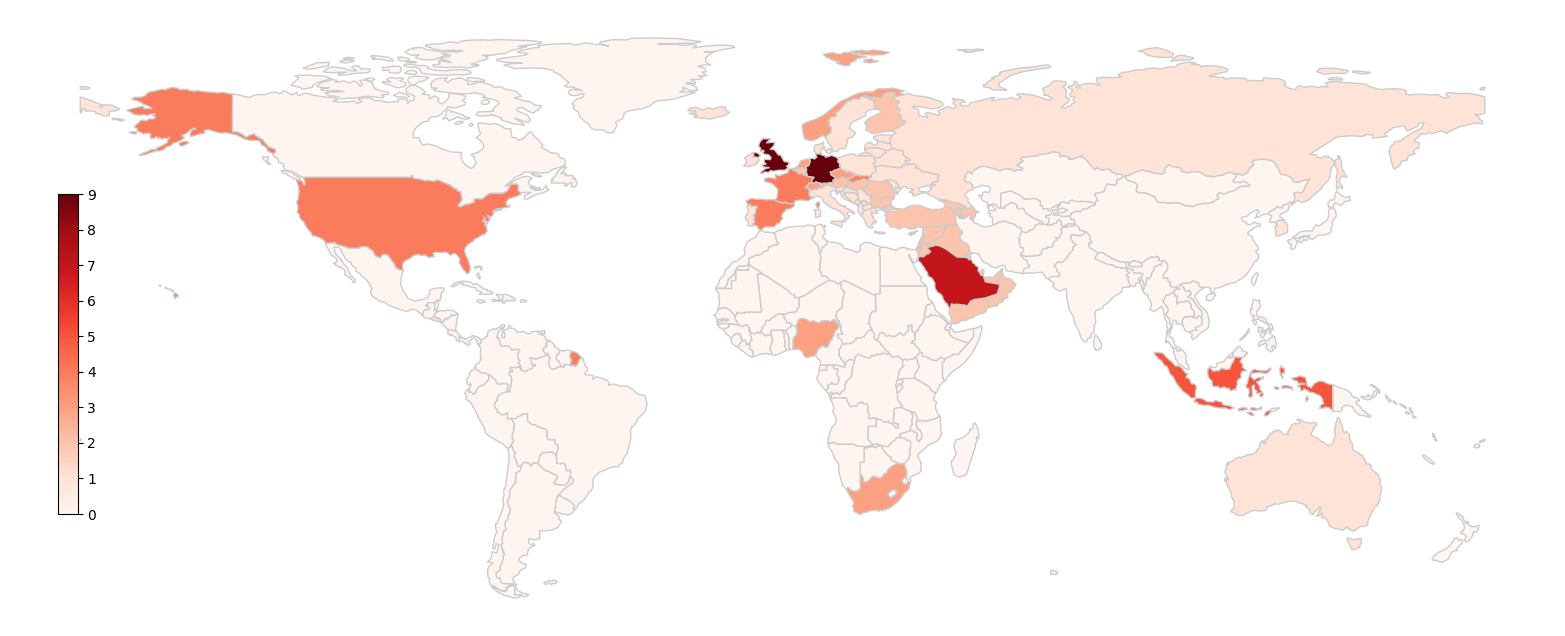

In [9]:
# https://geopandas.org/en/stable/docs/user_guide/mapping.html
# https://matplotlib.org/2.0.2/users/colormaps.html
cmap = 'Reds' 
col = 'lit_count'

fig, ax = plt.subplots(1, figsize=(20, 8))
ax.axis('off')

world_gdf.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)

# ax.set_title("Literature Geographic Distribution", fontdict={'fontsize': '18', 'fontweight': '3'})
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(
    vmin=world_gdf[col].min(), vmax=world_gdf[col].max()), cmap=cmap)


# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

In [10]:
# saving the image
fig.savefig('../images/geo_distribution.png', dpi=300)